In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

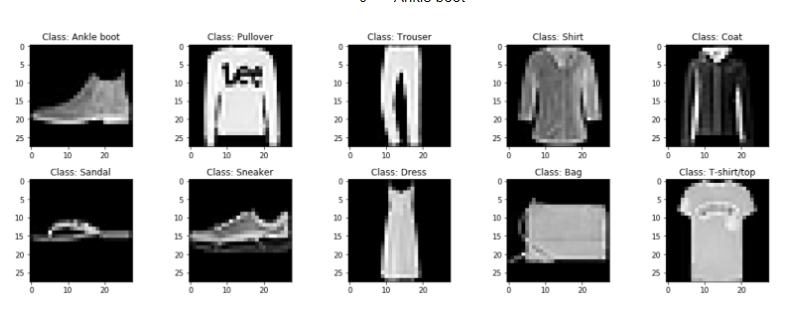

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Data reshaping - only change from ANN
making it 4D data

In [10]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

## Data Normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [11]:
X_train_n = X_train_full/255. # . to keep it in int type
X_test_n = X_test/255.


### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [14]:
# same as we did in ANN
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

## Creare the model architecture - with Pooling Layer
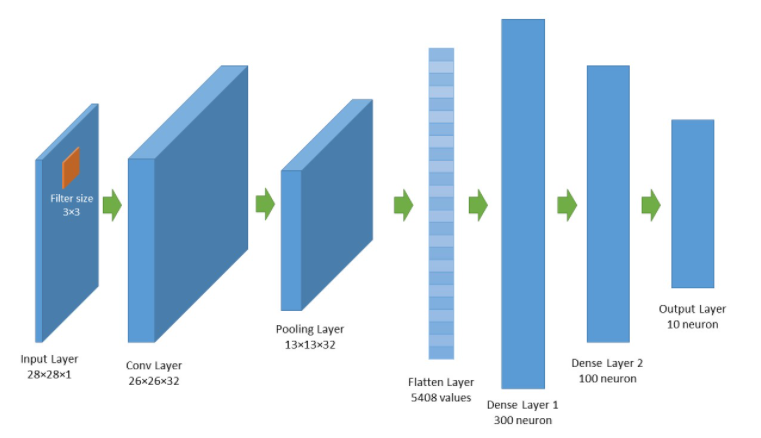
* Input Layer:28 - width, 28 - height, 1 - layer
* Convo Layer: 26 - width, 26 - height, 32 - different filter
* pooling Layer: 13 - width, 13 - height, 32 - cells
* 3D object into 1D array, so using Flatten Layer
* Dense Layer 1 with 300 neurons
* Dense Layer 2 with 100 neurons
* Output Layer with 10 neurons, since we need to identify 10 different classes

In [15]:
model = keras.models.Sequential() # Creating model object
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [18]:
model.summary() # in dense layer we can see that we have around 1.6 Million parameters to train
# if we have not used max_pooling then that no. would have around 6 Million
# it also helps in reducing the execution time since params are less comparatively

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [19]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",
              metrics=["accuracy"])

In [21]:
# Training our model
model_history = model.fit(X_train, y_train, epochs=10,batch_size= 64,
                    validation_data=(X_valid, y_valid))
# Since it takes alot of time in execution, so I am keeping the epochs as low as possible

Epoch 1/10
860/860 [==============================] - 21s 24ms/step - loss: 0.4463 - accuracy: 0.8403 - val_loss: 0.4140 - val_accuracy: 0.8582
Epoch 2/10
860/860 [==============================] - 19s 23ms/step - loss: 0.4154 - accuracy: 0.8516 - val_loss: 0.4235 - val_accuracy: 0.8462
Epoch 3/10
860/860 [==============================] - 21s 25ms/step - loss: 0.3960 - accuracy: 0.8576 - val_loss: 0.3917 - val_accuracy: 0.8638
Epoch 4/10
860/860 [==============================] - 22s 25ms/step - loss: 0.3740 - accuracy: 0.8673 - val_loss: 0.4253 - val_accuracy: 0.8434
Epoch 5/10
860/860 [==============================] - 19s 22ms/step - loss: 0.3604 - accuracy: 0.8702 - val_loss: 0.3707 - val_accuracy: 0.8654
Epoch 6/10
860/860 [==============================] - 19s 22ms/step - loss: 0.3449 - accuracy: 0.8756 - val_loss: 0.3738 - val_accuracy: 0.8680
Epoch 7/10
860/860 [==============================] - 19s 22ms/step - loss: 0.3324 - accuracy: 0.8795 - val_loss: 0.3302 - val_accuracy:

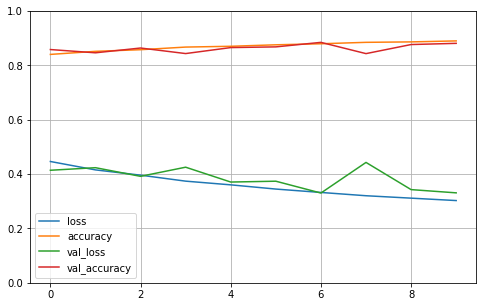

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3506 - accuracy: 0.8723


In [24]:
ev # [loss value, accuracy]

[0.3506312370300293, 0.8723000288009644]

In [25]:
X_new = X_test[:3] #we need new dataset for testing, but as of new we are using the first three object of this dataset only

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [27]:
y_test[:3] # we can see the actual values and predicted values are same 

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


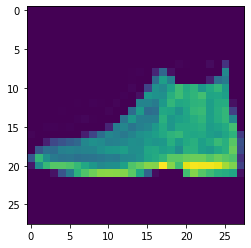

In [28]:
print(plt.imshow(X_test[0].reshape((28,28))))

## Crearting model Architecture - without Pooling Layer
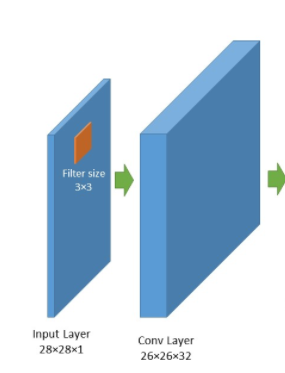 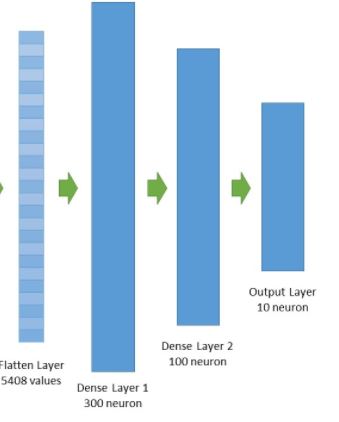

In [29]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [31]:
model_b.summary() # without Pooling layer we can see that Dense Layer have 6 Million parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [33]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 46s 53ms/step - loss: 0.7455 - accuracy: 0.7410 - val_loss: 0.5233 - val_accuracy: 0.8136
Epoch 2/3
860/860 [==============================] - 49s 58ms/step - loss: 0.4922 - accuracy: 0.8229 - val_loss: 0.5083 - val_accuracy: 0.8042
Epoch 3/3
860/860 [==============================] - 49s 57ms/step - loss: 0.4406 - accuracy: 0.8416 - val_loss: 0.4464 - val_accuracy: 0.8456


### using pooling Layer we can reduce the execution time as it reduces the parameters without affecting the accuracy


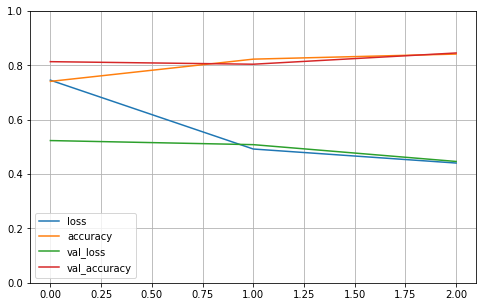

In [34]:
pd.DataFrame(model_history_b.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()